In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter#, FixedLocatorfrom
from matplotlib import gridspec
import matplotlib.dates as mdates
import xarray as xr
import os
from datetime import datetime
import cmocean as cm

In [3]:
files_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives"
dive_files = os.listdir(files_path)
dive_files.remove('.DS_Store')

science_vars = ["sea_water_density", "salinity", "temperature", "sea_water_sigma_t", "theta","time","depth","buoyancy", "absolute_salinity", "latitude_gsm", "longitude_gsm"]
# variables = [“density”, “salinity”, “temperature”, “sigma_t”, “theta”, “eng_depth”, “eng_vbdCC”,
#               “eng_elaps_t”, “absolute_salinity”, “latitude_gsm”, “longitude_gsm”, “density_insitu”, 
#               “buoyancy”, “depth”, “time”, “log_c_vbd”, 
#               “log_vbd_max”, “log_vbd_min”, “log_MAX_BUOY”, “sg_cal_volmax”]
print(dive_files)

['p1750009.nc', 'p1750008.nc', 'p1750007.nc', 'p1750003.nc', 'p1750002.nc', 'p1750006.nc', 'p1750001.nc', 'p1750005.nc', 'p1750004.nc']


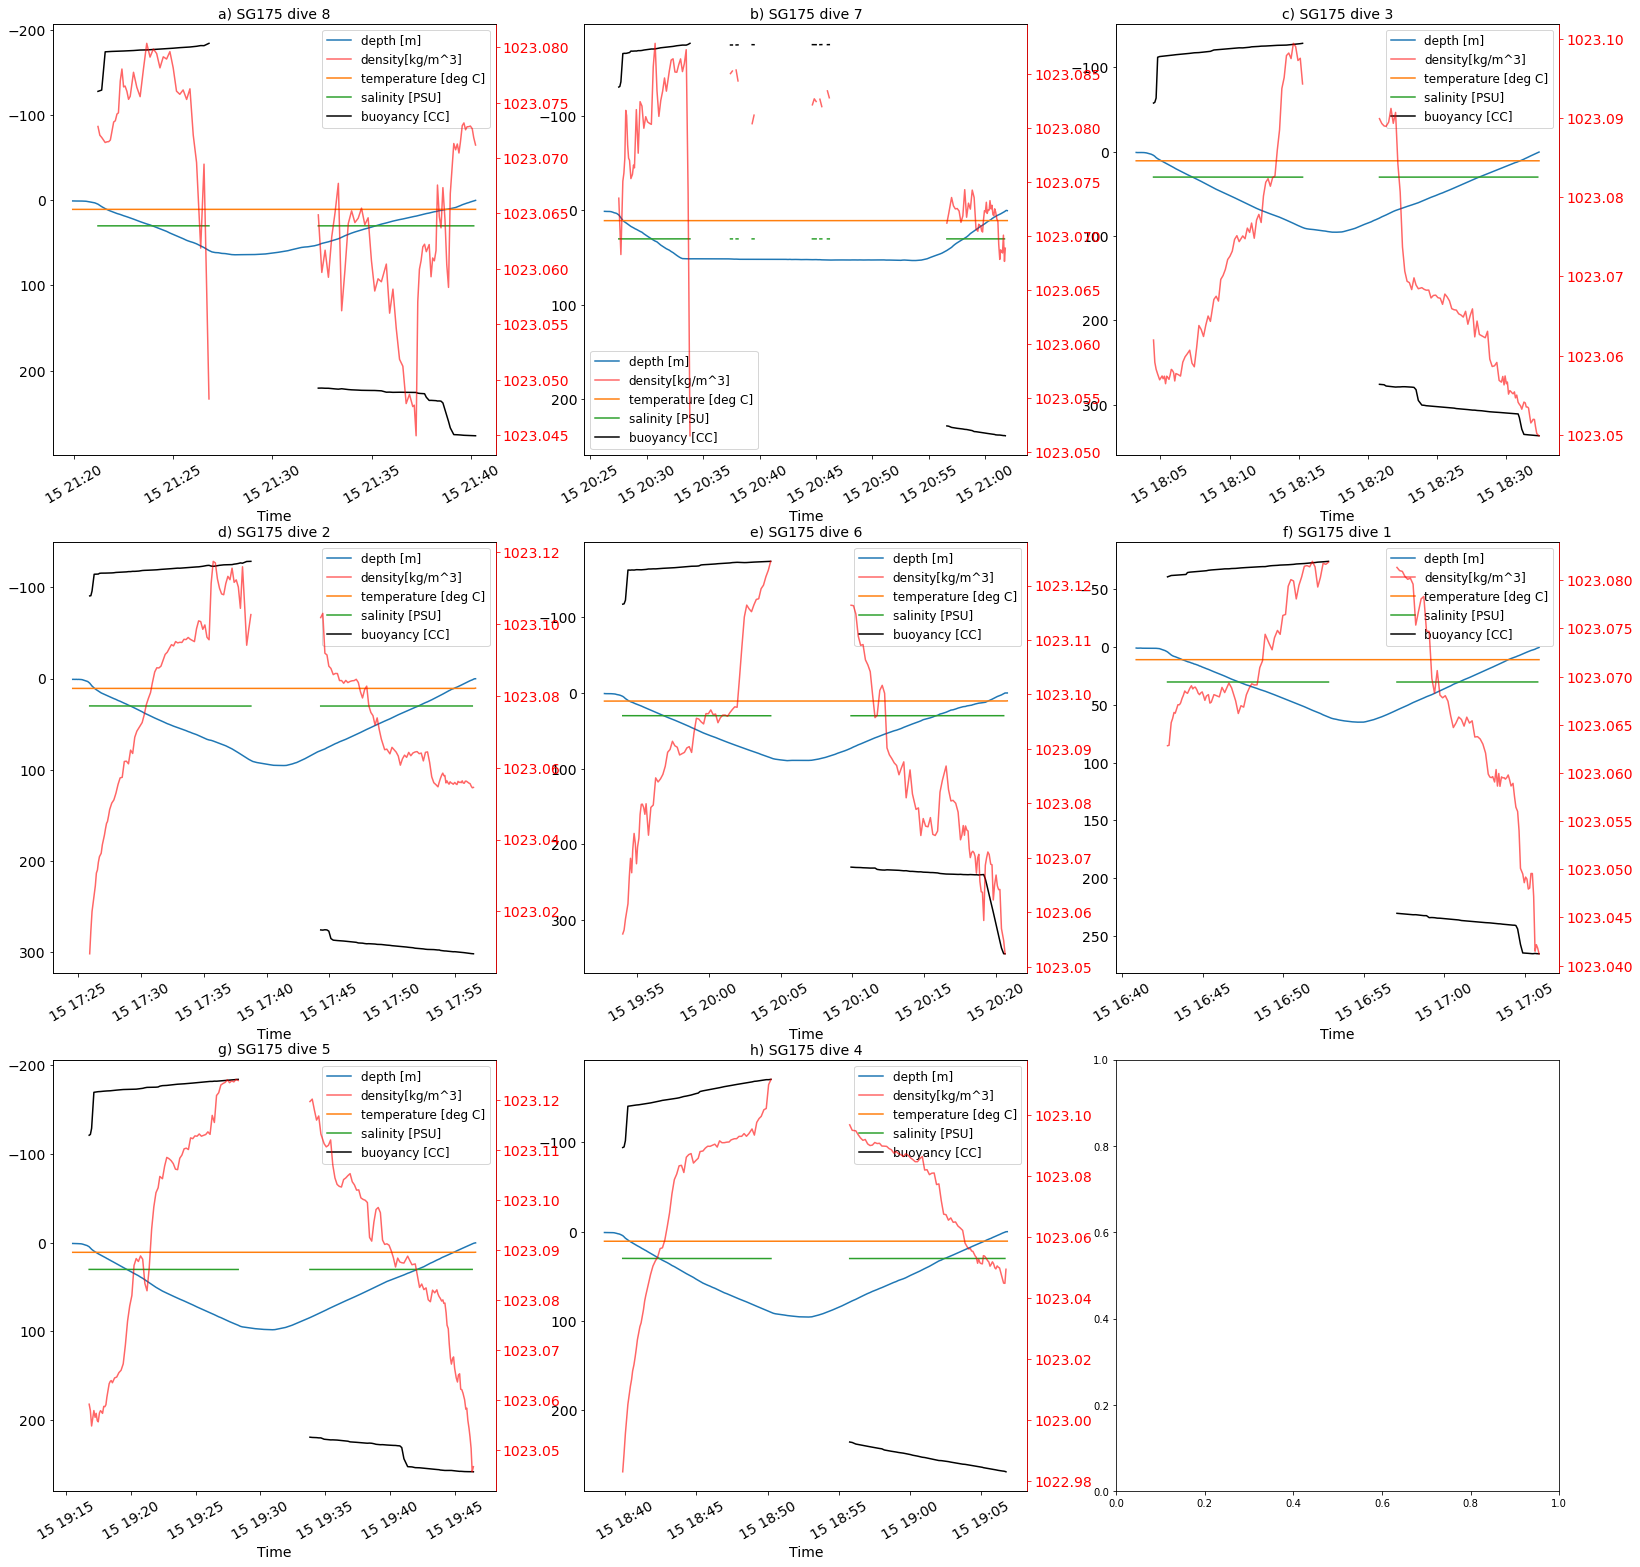

In [4]:
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(27,27))
scalar_formatter = ScalarFormatter(useOffset=False)
i=1
j = 'a'
plots = []
for file, ax in zip(dive_files[1:], axs.flat):
    data = xr.open_dataset(files_path + "/" + file)
    # display(data)

    # df = pd.DataFrame([data['temperature'], data['density'], data['pressure']], columns=['temp [deg C]', 'density g/m^3', 'pressure [dbar]'])
    # print(df)
    # df.to_csv(file[-3:]+".csv")
    
    y2 = ax.twinx()
    plots += ax.plot(data["time"], data["depth"], label="depth [m]")
    plots += y2.plot(data["time"], data["density"], label="density[kg/m^3]", c='red', alpha=0.6)
    plots += ax.plot(data["time"], data["temperature"], label="temperature [deg C]")
    plots += ax.plot(data["time"], data["salinity"], label = "salinity [PSU]")
    plots += ax.plot(data["time"], data["buoyancy"], c='k',label = "buoyancy [CC]")
    ax.invert_yaxis()

    ax.set_title(f"{j}) SG175 dive {dive_files[i][-4]}", fontsize=14)
    i+=1
    j = chr(ord(j) + 1)

    ax.set_xlabel("Time", fontsize=14)
    labels = [l.get_label() for l in plots]
    ax.legend(plots, labels, loc='best', fontsize=12)
    ax.tick_params(labelsize=14)
    y2.yaxis.set_major_formatter(scalar_formatter)
    y2.tick_params(labelsize=14)
    y2.spines['right'].set_color('red')
    y2.tick_params(axis='y', colors='red')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    
    plots=[]
# plt.savefig("bigGraph.pdf")
plt.show()

In [5]:
i=1
for file in dive_files[1:]:
    data = xr.open_dataset(files_path + "/" + file)
    # display(data['density'].values)

    df = pd.DataFrame()
    df["time"] = data["time"].values
    df["temperature"] = data["temperature"].values
    df["density"] = data["density"].values
    df["pressure"] = data["pressure"].values
    df["absolute_salinity"] = data["absolute_salinity"].values

    # df = df.dropna()

    print(df)
    # df.to_csv("/Users/calebflaim/Documents/toAddToThesis/diveDataCsv/" + f"SG175_dive_{i}" + ".csv")

    i+=1

                             time  temperature      density  pressure  \
0   2023-12-15 21:19:56.200999936    10.900796          NaN  1.006534   
1   2023-12-15 21:20:01.492000000    10.889666          NaN  1.087057   
2   2023-12-15 21:20:08.209000192    10.892088          NaN  1.107187   
3   2023-12-15 21:20:13.473999872    10.896955          NaN  1.097122   
4   2023-12-15 21:20:18.764000000    10.896184          NaN  1.127318   
..                            ...          ...          ...       ...   
146 2023-12-15 21:39:53.912000000    10.854220  1023.072837  2.908883   
147 2023-12-15 21:39:58.469000192    10.854326  1023.072890  2.234505   
148 2023-12-15 21:40:04.088000000    10.854137  1023.072646  1.580258   
149 2023-12-15 21:40:08.508999936    10.851264  1023.071855  1.036730   
150 2023-12-15 21:40:14.088000000    10.853472  1023.071176  0.342222   

     absolute_salinity  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN 

SG175_dive_6_sal_estimation.csv
SG175_dive_5_sal_estimation.csv
SG175_dive_3_sal_estimation.csv
SG175_dive_1_sal_estimation.csv
SG175_dive_2_sal_estimation.csv
SG175_dive_9_sal_estimation.csv
SG175_dive_4_sal_estimation.csv
SG175_dive_7_sal_estimation.csv


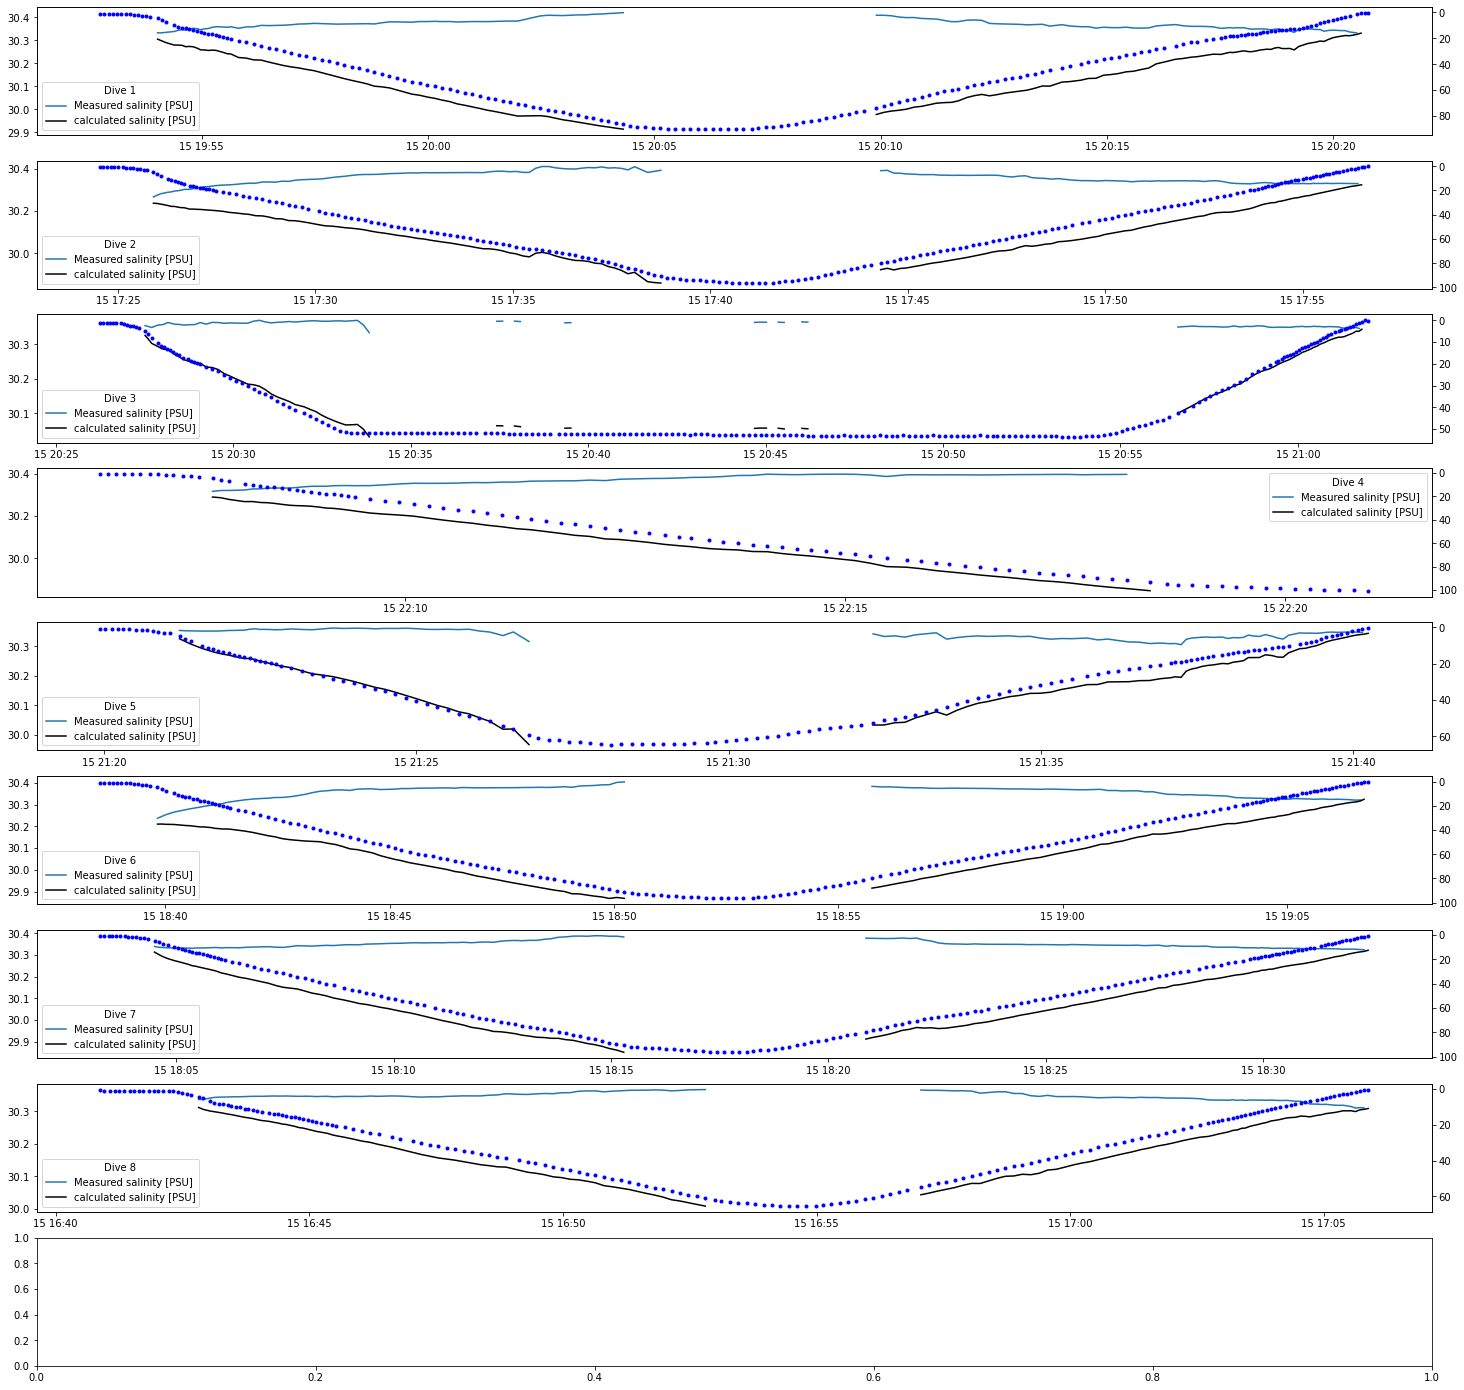

In [6]:
sal_est_read_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/salinityEstimationVals/"
sal_est_files = os.listdir(sal_est_read_path); sal_est_files.pop(1)

press_read_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/diveDataCsv"
press_files = os.listdir(press_read_path)

fig, ax = plt.subplots(9, 1, figsize=(25, 25))
for i, file in enumerate(sal_est_files):
    print(file)
    df = pd.read_csv(sal_est_read_path+file)
    # df2 = pd.read_csv(press_read_path+press_files[i]).dropna()
    y2 = ax[i].twinx() 
    y2.invert_yaxis()
    # [datetime.strptime(df['time'][i], '%y-%m-%d %H:%M:%S.%f') for i in range(len(df['time']))]
    df['time'] = pd.to_datetime(df['time'])
    ax[i].plot(df["time"], df["absolute_salinity"], label="Measured salinity [PSU]")
    ax[i].plot(df["time"], df["calculated_sal"], c = 'k', label="calculated salinity [PSU]")
    y2.scatter(df["time"], df["pressure"], c = 'b', marker='.',label="depth [dbar]")
    # ax[i].plot(df['time'], df2['pressure'], c='g', label='pressure')
    ax[i].legend(title=f"Dive {i+1}")

    # labels = [l.get_label() for l in plots]
    # print(df)

plt.show()

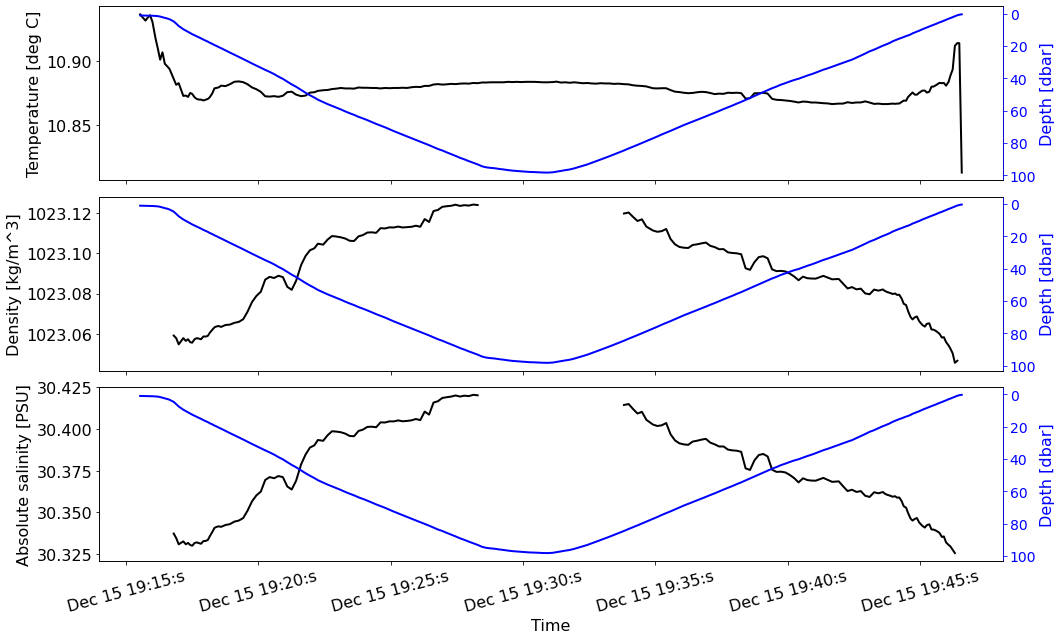

In [7]:
fig, axs = plt.subplots(3, 1, figsize =  (15, 9), sharex=True)

file_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/p1750005.nc"
vars_to_plot = ["temperature", "density", "absolute_salinity"]
ylabels = ["Temperature", "Density", "Absolute salinity"]
letters = ["a)", "b)", "c)"]
units = ['[deg C]', "[kg/m^3]", "[PSU]"]
data = xr.open_dataset(file_path)
# display(dive5)

fontsize = 16
scalar_formatter = ScalarFormatter(useOffset=False)

for i, ax in enumerate(axs):
    plots = []
    y2 = ax.twinx()
    y2.invert_yaxis()

    plots += ax.plot(data["time"], data[vars_to_plot[i]], linewidth=2, c='k', label = vars_to_plot[i])
    plots += y2.plot(data["time"], data["depth"], linewidth=2, c='b', label = "depth")

    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.yaxis.set_major_formatter(scalar_formatter)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M:s'))
    if i == 2:
        ax.set_xlabel("Time", fontsize=fontsize)
    ax.set_ylabel(ylabels[i] + " " + units[i], fontsize=fontsize)
    # ax.set_title(letters[i])

    y2.tick_params(labelsize=14)
    y2.spines['right'].set_color('b')
    y2.tick_params(axis='y', colors='b')
    y2.set_ylabel("Depth [dbar]", c='b', fontsize=fontsize)

    for tick in ax.get_xticklabels():
        tick.set_rotation(15)

    # labels = [l.get_label() for l in plots]

    # ax.legend(plots, labels, fontsize = 14)

plt.tight_layout()
plt.show()

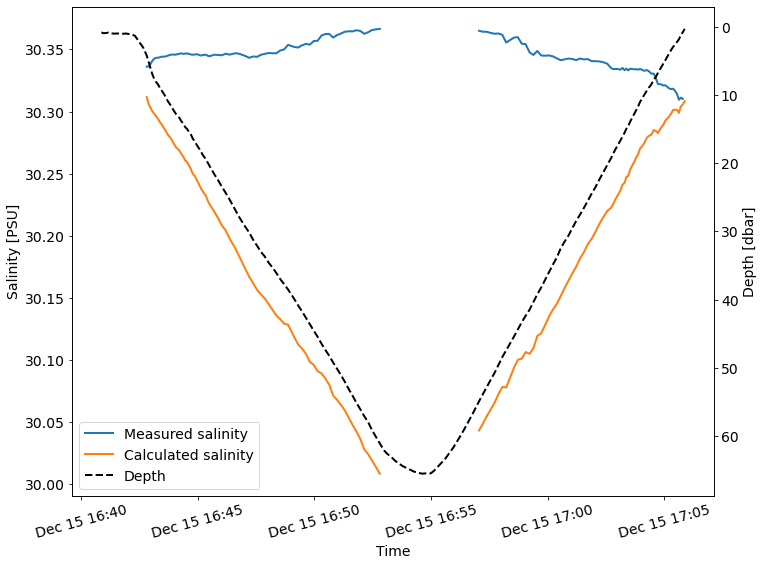

In [8]:
fig, ax = plt.subplots(figsize =  (11.5, 9))
path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/salinityEstimationVals/SG175_dive_5_sal_estimation.csv"

plots = []
df = pd.read_csv(sal_est_read_path+file)
# df2 = pd.read_csv(press_read_path+press_files[i]).dropna()
y2 = ax.twinx() 
y2.invert_yaxis()

# [datetime.strptime(df['time'][i], '%y-%m-%d %H:%M:%S.%f') for i in range(len(df['time']))]
df['time'] = pd.to_datetime(df['time'])
plots += ax.plot(df["time"], df["absolute_salinity"], linewidth=2,label="Measured salinity")
plots += ax.plot(df["time"], df["calculated_sal"], linewidth=2, label="Calculated salinity")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(labelsize=14)

ax.set_ylabel("Salinity [PSU]", fontsize = 14)
ax.set_xlabel("Time", fontsize = 14)


plots += y2.plot(df["time"], df["pressure"], linewidth=2, c = 'k', linestyle="--",label="Depth")
y2.tick_params(labelsize=14)
y2.spines['right'].set_color('k')
y2.tick_params(axis='y', colors='k')
y2.set_ylabel("Depth [dbar]", c='k', fontsize=14)

# ax.legend(fontsize=14)
labels = [l.get_label() for l in plots]
ax.legend(plots, labels, fontsize = 14)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
for tick in ax.get_xticklabels():
    tick.set_rotation(15)

# labels = [l.get_label() for l in plots]
# print(df)

plt.show()

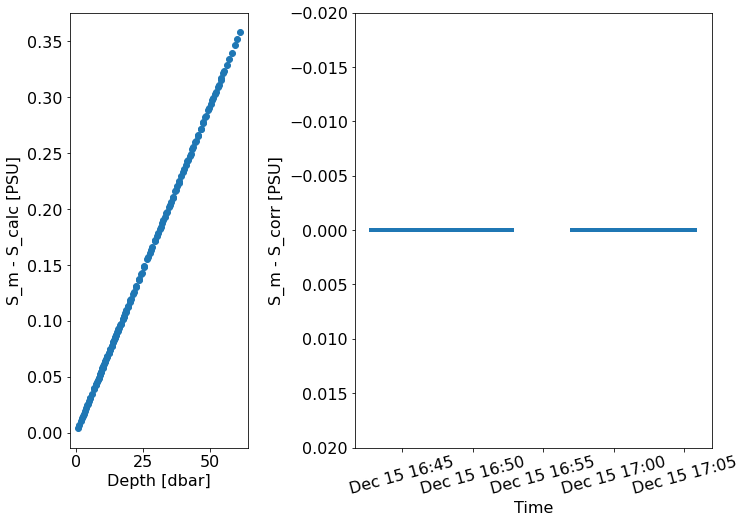

In [9]:
path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/salinityEstimationVals/SG175_dive_5_sal_estimation.csv"
plots = []
df = pd.read_csv(sal_est_read_path+file)
df['time'] = pd.to_datetime(df['time'])

sal_corection = df["absolute_salinity"] - df["calculated_sal"]

fig, axs = plt.subplots(1,2, figsize=(11.5, 8), gridspec_kw={
                           'width_ratios': [2, 4],
                           'height_ratios': [3],
                       'wspace': 0.4,
                       'hspace': 0.4})

axs[0].scatter(df['pressure'], sal_corection)
axs[0].set_ylabel("S_m - S_calc [PSU]", fontsize=fontsize)
axs[0].set_xlabel("Depth [dbar]",fontsize=fontsize)
axs[0].tick_params(labelsize=16)

corrected_sal = df['calculated_sal'] + sal_corection
# axs[1].plot(df['time'], sal_corection, label = "Salinity correction")
axs[1].plot(df['time'],  df['absolute_salinity']-corrected_sal, linewidth=4,label= "Correct salinity")
axs[1].set_ylim([0.02, -0.02])
axs[1].set_ylabel("S_m - S_corr [PSU]",  fontsize=fontsize)
axs[1].set_xlabel("Time", fontsize=fontsize)
axs[1].tick_params(labelsize=16)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
for tick in axs[1].get_xticklabels():
    tick.set_rotation(15)



In [10]:
##THird plot be deviation of calculated sal from pressure
## do with CTD data and ARGO

In [11]:
path = "/Users/calebflaim/Downloads/0498 8500 DD19 04-20240122 155752.csv"
df = pd.read_csv(path, skiprows=20)
df['time'] = pd.to_datetime(df['time'])


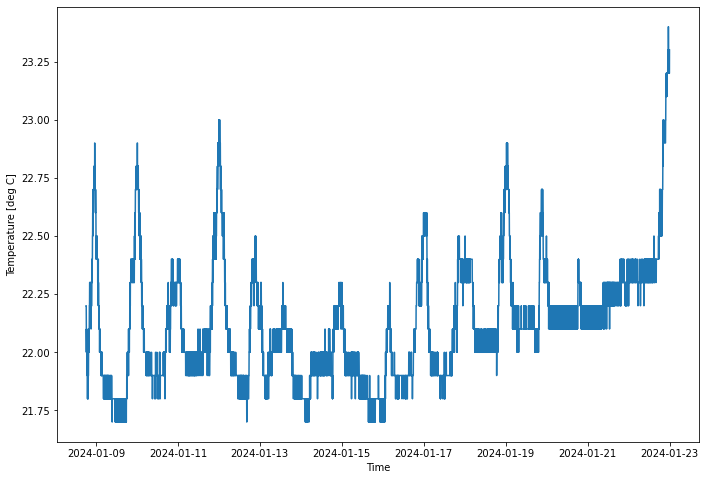

In [12]:
_, ax = plt.subplots(figsize=(11.5, 8))
ax.plot(df['time'], df['temp'])
ax.set_xlabel("Time")
ax.set_ylabel("Temperature [deg C]")
plt.show()

In [13]:
data_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/"
files = os.listdir(data_path)
files.remove('.DS_Store')

for file in files:
    data_set = xr.open_dataset(data_path+file)

    display(data_set)
    # print("rho: ", data_set['log_RHO'].values)
    # print("Mass: ", data_set['log_MASS'].values)
    # print("VBD min: ", data_set['log_VBD_MIN'].values)
    # print("VBD max: ", data_set['log_VBD_MAX'].values)
    print("C VBD: ", data_set['log_C_VBD'].values)
    # print("sg_cal_volmax: ", data_set['sg_cal_volmax'])
    # print("Max buoy: ", data_set['log_MAX_BUOY'].values)
    # print("log_VBD_CNV: ", data_set['log_VBD_CNV'].values)
    # print("VBD cc", data_set['eng_vbdCC'].values)
    # print()
    # print("vbd min: ", data_set['log_VBD_MIN'].values*data_set['log_VBD_CNV'].values)
    # print("vbd max: ", data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values)
    # glider_vol = data_set['sg_cal_volmax'].values + data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values
    # dive_vbd = -np.min(data_set['eng_vbdCC'].values)
    # print("dive vbd: ", dive_vbd)
    # print(glider_vol)
    # print(np.min(data_set['eng_vbdCC'].values))
    # print("glider density: ", 51709.0/(glider_vol + dive_vbd ))
    # print(data_set['log_C_VBD'].values*data_set['log_VBD_CNV'].values)
    print()
#log_RHO
#log_MASS
#log_VBD_MIN
#log_VBD_MAX
#log_C_VBD
#log_SM_CC
#gc_vbd_ad

<xarray.Dataset>
Dimensions:                             (gc_event: 7, gc_state: 5, gps_info: 3,
                                         sg_data_point: 100,
                                         magnetometer_data_point: 100,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 9
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/455)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    magnetometer                        |S12 ...
    sbe43                               |S5 ...
    sbe41                               |S5 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T22:12:31Z
    time_coverage_end:               2023-12-15T22:12:56Z
    geospatial_lat_min:              47.49691666666666
    geospatial_lat_max:              47.49884723992158
    geospatial_lon_min:              -122.4940020795778
    geospatial_lon_max:              -122.49333605567408
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 8, gc_state: 10,
                                         gps_info: 3, sg_data_point: 151,
                                         magnetometer_data_point: 151,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 8
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/455)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    magnetometer                        |S12 ...
    sbe43                               |S5 ...
    sbe41                               |S5 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T21:12:56Z
    time_coverage_end:               2023-12-15T21:12:14Z
    geospatial_lat_min:              47.49594164676847
    geospatial_lat_max:              47.498069692698614
    geospatial_lon_min:              -122.50425525197383
    geospatial_lon_max:              -122.50313493948526
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 14, gc_state: 10,
                                         gps_info: 3, sg_data_point: 240,
                                         magnetometer_data_point: 240,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 7
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/454)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    magnetometer                        |S12 ...
    sbe43                               |S5 ...
    sbe41                               |S5 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T20:12:14Z
    time_coverage_end:               2023-12-15T21:12:58Z
    geospatial_lat_min:              47.489399999999996
    geospatial_lat_max:              47.49354718472893
    geospatial_lon_min:              -122.51205
    geospatial_lon_max:              -122.50671973946365
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 15, gc_state: 10,
                                         gps_info: 3, sg_data_point: 202,
                                         magnetometer_data_point: 202,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 3
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/454)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    sbe43                               |S5 ...
    sbe41                               |S5 ...
    magnetometer                        |S12 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T18:12:14Z
    time_coverage_end:               2023-12-15T18:12:25Z
    geospatial_lat_min:              47.450833333333335
    geospatial_lat_max:              47.46067314999734
    geospatial_lon_min:              -122.52341666666668
    geospatial_lon_max:              -122.5179498202796
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 19, gc_state: 10,
                                         gps_info: 3, sg_data_point: 221,
                                         magnetometer_data_point: 221,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 2
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/455)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    magnetometer                        |S12 ...
    sbe41                               |S5 ...
    sbe43                               |S5 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T17:12:32Z
    time_coverage_end:               2023-12-15T17:12:39Z
    geospatial_lat_min:              47.448633333333326
    geospatial_lat_max:              47.44992403577863
    geospatial_lon_min:              -122.5239375128302
    geospatial_lon_max:              -122.52360825283219
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 13, gc_state: 10,
                                         gps_info: 3, sg_data_point: 197,
                                         magnetometer_data_point: 197,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 6
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/455)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    sbe43                               |S5 ...
    sbe41                               |S5 ...
    magnetometer                        |S12 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T19:12:45Z
    time_coverage_end:               2023-12-15T20:12:46Z
    geospatial_lat_min:              47.48278333333333
    geospatial_lat_max:              47.48823554463924
    geospatial_lon_min:              -122.51302461330579
    geospatial_lon_max:              -122.5116991181247
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 16, gc_state: 10,
                                         gps_info: 3, sg_data_point: 187,
                                         magnetometer_data_point: 187,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 1
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/454)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    sbe41                               |S5 ...
    sbe43                               |S5 ...
    magnetometer                        |S12 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T16:12:52Z
    time_coverage_end:               2023-12-15T17:12:52Z
    geospatial_lat_min:              47.44291666666666
    geospatial_lat_max:              47.444641353165196
    geospatial_lon_min:              -122.52427152222043
    geospatial_lon_max:              -122.52373117874292
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 15, gc_state: 10,
                                         gps_info: 3, sg_data_point: 216,
                                         magnetometer_data_point: 216,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 5
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/455)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    magnetometer                        |S12 ...
    sbe43                               |S5 ...
    sbe41                               |S5 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T19:12:32Z
    time_coverage_end:               2023-12-15T19:12:34Z
    geospatial_lat_min:              47.473216666666666
    geospatial_lat_max:              47.48125507988779
    geospatial_lon_min:              -122.51259683258988
    geospatial_lon_max:              -122.51110380113147
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



<xarray.Dataset>
Dimensions:                             (gc_event: 14, gc_state: 10,
                                         gps_info: 3, sg_data_point: 198,
                                         magnetometer_data_point: 198,
                                         trajectory: 1)
Coordinates:
    ctd_time                            (sg_data_point) datetime64[ns] ...
    ctd_depth                           (sg_data_point) float64 ...
    latitude                            (sg_data_point) float64 ...
    longitude                           (sg_data_point) float64 ...
  * trajectory                          (trajectory) int32 4
Dimensions without coordinates: gc_event, gc_state, gps_info, sg_data_point,
                                magnetometer_data_point
Data variables: (12/455)
    sg_cal_id_str                       |S3 ...
    sg_cal_mission_title                |S34 ...
    sg_cal_mass                         float64 ...
    sg_cal_calibcomm                    |S39 ...
    sg_cal_t_g                          float64 ...
    sg_cal_t_h                          float64 ...
    ...                                  ...
    eng_mag_y                           (magnetometer_data_point) float64 ...
    eng_mag_z                           (magnetometer_data_point) float64 ...
    glider                              |S15 ...
    magnetometer                        |S12 ...
    sbe43                               |S5 ...
    sbe41                               |S5 ...
Attributes: (12/48)
    time_coverage_start:             2023-12-15T18:12:32Z
    time_coverage_end:               2023-12-15T19:12:48Z
    geospatial_lat_min:              47.46236666666667
    geospatial_lat_max:              47.47083618763336
    geospatial_lon_min:              -122.51753333333333
    geospatial_lon_max:              -122.51253010847967
    ...                              ...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Conventions:                     CF-1.6
    standard_name_vocabulary:        CF-1.6
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    nodc_template_version:           NODC_NetCDF_Trajectory_Template_v0.9

C VBD:  2701



In [14]:
data_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/"
files = os.listdir(data_path)
if '.DS_Store' in files: files.remove('.DS_Store') # remove b/c idk how to use GIT 

dive_rhos = []
apogee_rhos = []
climb_rhos = []
for file in files:
    data_set = xr.open_dataset(data_path+file) # load in data
    # apogee_ds = data_set.sel(ctd_depth=np.max(data_set["depth"]))
    temp = data_set['temperature'].isel(ctd_depth=data_set['depth'].argmax())

    vbd_min = -data_set['log_VBD_MIN'].values*data_set['log_VBD_CNV'].values # get VBD min volume
    vbd_max = -data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values # get VBD max volume
    # print("vbd min: ", vbd_min)
    # print("vbd max: ", vbd_max)

    glider_mass = data_set['log_MASS'].values # get glider mass
    # print("Glider mass: ", glider_mass)

    glider_base_vol = data_set['sg_cal_volmax'].values + data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values # calculate glider base volume
    # print("glider volume: ", glider_base_vol)

    dive_vbd = -np.min(data_set['eng_vbdCC'].values) # calculate bladder vol for dive
    apogee_vbd = -data_set['log_C_VBD'].values*data_set['log_VBD_CNV'].values # get bladder vol at neutral buoyancy
    climb_vbd = np.max(data_set['eng_vbdCC'].values)# calculate bladder vol for climb
    # print("dive vbd: ", dive_vbd)
    # print('Apogee vbd: ', apogee_vbd)
    # print("climb vbd: ", climb_vbd)

    # calculated densities for three dive stages of interest
    dive_density = glider_mass/(glider_base_vol + dive_vbd )
    apogee_density = glider_mass/(glider_base_vol + (vbd_max - apogee_vbd))
    climb_density = glider_mass/(glider_base_vol + climb_vbd+ dive_vbd )

    # print("glider dive density: ", dive_density)
    # print("glider density at dive min: ", apogee_density) # subtract C_VBD from VBD_MAX since C_VBD is not centered around 0
    # print("glider climb density: ", climb_density) # adds climmb vbd to dive vbd since there is a sign change
    # print()

    dive_rhos += dive_density
    apogee_rhos += apogee_density
    climb_rhos += climb_density
    # df = pd.DataFrame()
    # df["dive_rho"] = dive_density
    # df["apogee_rho"] = apogee_density
    # df["climb_rho"] = climb_density
    # df['temp'] = apogee_ds['tempurature'].values
    # df['depth'] = apogee_ds['depth'].values
    # df['sal'] = apogee_ds['absolute_salinity'].values

    # print(df)


ValueError: Dimensions {'ctd_depth'} do not exist. Expected one or more of Frozen({'sg_data_point': 100})

IndexError: list index out of range

/Users/calebflaim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/calebflaim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0, flags=flags)


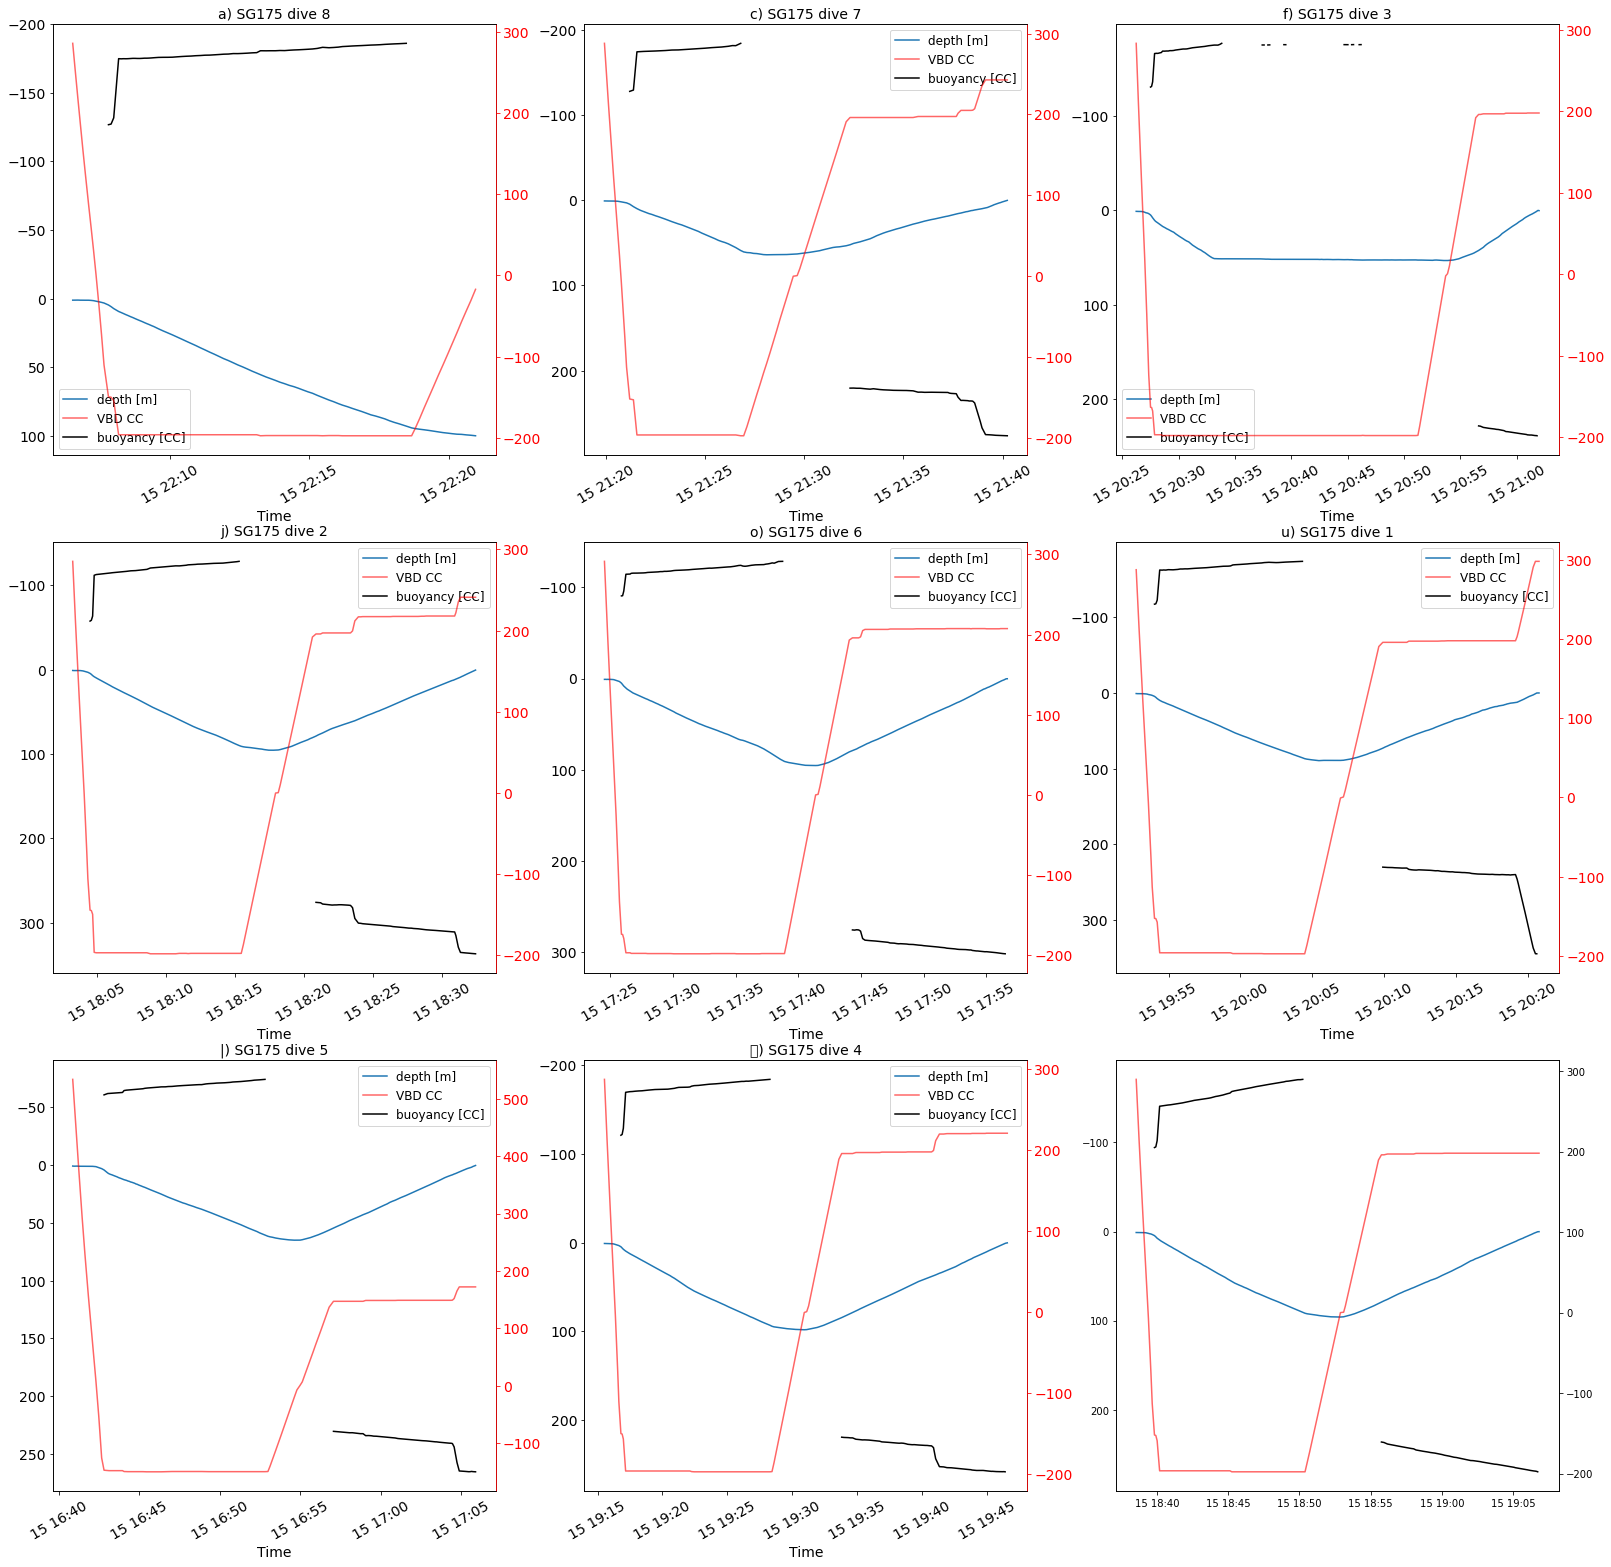

In [ ]:
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(27,27))
scalar_formatter = ScalarFormatter(useOffset=False)
i=1
j = 'a'
plots = []
for file, ax in zip(files, axs.flat):
    data = xr.open_dataset(files_path + "/" + file)
    # display(data)

    # df = pd.DataFrame([data['temperature'], data['density'], data['pressure']], columns=['temp [deg C]', 'density g/m^3', 'pressure [dbar]'])
    # print(df)
    # df.to_csv(file[-3:]+".csv")
    
    y2 = ax.twinx()
    plots += ax.plot(data["time"], data["depth"], label="depth [m]")
    plots += y2.plot(data["time"], data['eng_vbdCC'], label="VBD CC", c='red', alpha=0.6)
    # plots += ax.plot(data["time"], data["temperature"], label="temperature [deg C]")
    # plots += ax.plot(data["time"], data["salinity"], label = "salinity [PSU]")
    plots += ax.plot(data["time"], data["buoyancy"], c='k',label = "buoyancy [CC]")
    
    ax.invert_yaxis()

    ax.set_title(f"{j}) SG175 dive {files[i][-4]}", fontsize=14)
    i+=1
    j = chr(ord(j) + i)

    ax.set_xlabel("Time", fontsize=14)
    labels = [l.get_label() for l in plots]
    ax.legend(plots, labels, loc='best', fontsize=12)
    ax.tick_params(labelsize=14)
    y2.yaxis.set_major_formatter(scalar_formatter)
    y2.tick_params(labelsize=14)
    y2.spines['right'].set_color('red')
    y2.tick_params(axis='y', colors='red')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    
    plots=[]
# plt.savefig("bigGraph.pdf")
plt.show()

['p1750001.nc', 'p1750002.nc', 'p1750003.nc', 'p1750004.nc', 'p1750005.nc', 'p1750006.nc', 'p1750007.nc', 'p1750008.nc', 'p1750009.nc']


<ipython-input-190-2335a8febff4>:36: UserWarning: Use the colorbar set_ticks() method instead.
  cbar.ax.set_yticks(ticks)
<ipython-input-190-2335a8febff4>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticks, fontsize=16)


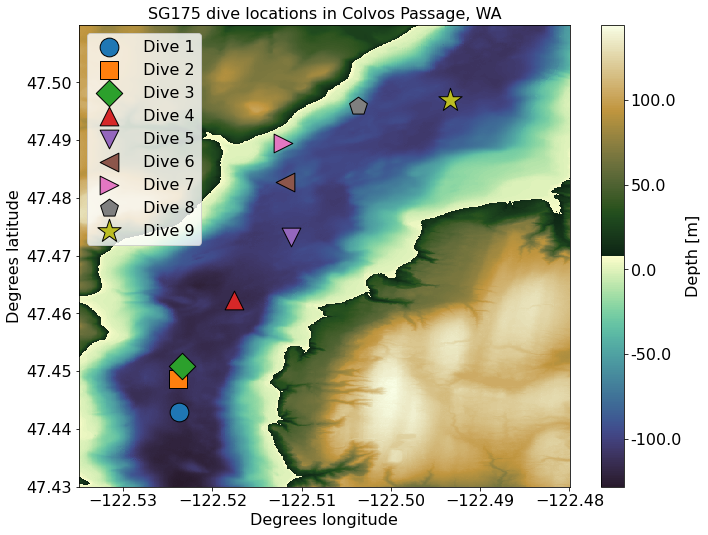

In [ ]:
data_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/"
bathy_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/puget_sound_13_navd88_2014.nc"
files = os.listdir(data_path)
files.remove('.DS_Store')
files = sorted(files, key=lambda x: int(x[-4]))
print(files)
bathy = xr.open_dataset(bathy_path)

lonMin = -122.535
lonMax = -122.48
latMin = 47.43
latMax = 47.51

# It saves a lot of time waiting if you limit the bathymetry data set in the beginning!
bathy2 = bathy.sel(lon=slice(lonMin,lonMax))
bathy = bathy2.sel(lat=slice(latMin,latMax))
scatter_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']
# display(bathy)

fig, ax = plt.subplots(figsize = (11, 8.5))
plot = plt.pcolormesh(bathy['lon'],bathy['lat'],bathy['Band1'],cmap=cm.cm.topo,shading='nearest')
plots = []
for i, file in enumerate(files):
    data_set = xr.open_dataset(data_path+file)
    # display(data_set)
    # print(data_set['log_gps_lon'])
    # print(data_set['log_gps_lat'])
    if i < 8:
        ax.scatter(data_set['log_gps_lon'][1], data_set['log_gps_lat'][1], s = 350, marker=scatter_markers[i], edgecolors = 'k', linewidths = 1, label = f" Dive {file[-4]}")
    else:
        ax.scatter(data_set['log_gps_lon'][1], data_set['log_gps_lat'][1], s = 600, marker=scatter_markers[i], edgecolors = 'k', linewidths = 1, label = f" Dive {file[-4]}")

cbar = fig.colorbar(plot)
cbar.set_label("Depth [m]", fontsize = 16)
ticks = cbar.ax.get_yticks()
cbar.ax.set_yticks(ticks)
cbar.ax.set_yticklabels(ticks, fontsize=16)
ax.set_ylabel("Degrees latitude",  fontsize=16)
ax.set_xlabel("Degrees longitude", fontsize=16)
ax.tick_params(labelsize=16)
ax.set_title("SG175 dive locations in Colvos Passage, WA", fontsize=16)
ax.legend(fontsize=16)


plt.show()

<ipython-input-16-13c0032bce5c>:48: UserWarning: Use the colorbar set_ticks() method instead.
  cb.ax.set_yticks(ticks)
<ipython-input-16-13c0032bce5c>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(ticks, fontsize=18)


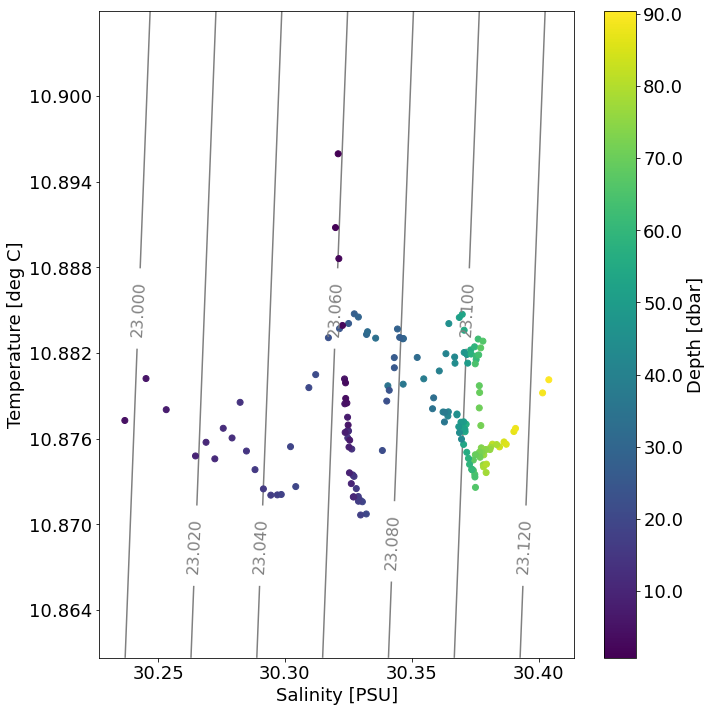

In [16]:
import gsw
from matplotlib.ticker import MaxNLocator

ds = xr.open_dataset('/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/p1750004.nc')
df = pd.DataFrame()
t = ds['temperature'].values
s = ds["absolute_salinity"].values
d = ds['depth'].values
df["temp"] = t
df["sal"] = s
df['depth'] = d
df = df.dropna()

mint=np.min(df['temp'])
maxt=np.max(df['temp'])

mins=np.min(df["sal"])
maxs=np.max(df["sal"])

tempL=np.linspace(mint-.01,maxt+.01,len(df["temp"]))

salL=np.linspace(mins-.01,maxs+.01,len(df["temp"]))

Tg, Sg = np.meshgrid(tempL,salL)
sigma_theta = gsw.sigma0(Sg, Tg)
# cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),len(df["temp"]))

fig,ax=plt.subplots(figsize=(10,10))
#fig.suptitle('programmer:Hafez Ahmad', fontsize=14, fontweight='bold')
cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
cl=plt.clabel(cs,fontsize=16,inline=True,fmt='%.3f')

sc=plt.scatter(df["sal"].values, df['temp'].values, c=df['depth'])

cb=plt.colorbar(sc)

ax.set_xlabel('Salinity [PSU]', fontsize=18)

ax.set_ylabel('Temperature [deg C]', fontsize = 18) # [$^\circ$C]
# ax.set_title('General T-S (Temperature and salinity) Diagram',fontsize=14, fontweight='bold')
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.tick_params(direction='out')
ax.tick_params(labelsize=18)
cb.ax.tick_params(direction='out')
cb.set_label('Depth [dbar]', fontsize=18)
ticks = cb.ax.get_yticks()
cb.ax.set_yticks(ticks)
cb.ax.set_yticklabels(ticks, fontsize=18)
plt.tight_layout()
# plt.savefig('ts_diagram.png',format='png',dpi=900,transparent=False)
plt.show()

<ipython-input-23-09adb7137621>:59: UserWarning: Use the colorbar set_ticks() method instead.
  cb.ax.set_yticks(ticks)
<ipython-input-23-09adb7137621>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(ticks, fontsize=18)


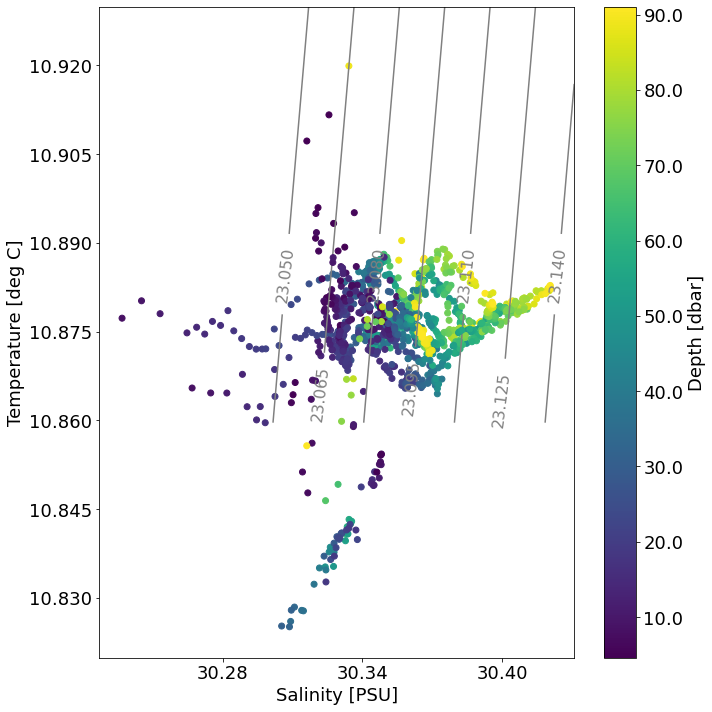

In [23]:
data_path = '/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/'

files = os.listdir(data_path)
files.remove('.DS_Store')
files = sorted(files, key=lambda x: int(x[-4]))
fig,ax=plt.subplots(figsize=(10,10))
max_t = 1
min_t = 1000
max_s = 1
min_s = 1000
for file in files:
    ds = xr.open_dataset(data_path+file)
    df = pd.DataFrame()
    t = ds['temperature'].values
    s = ds["absolute_salinity"].values
    d = ds['depth'].values
    df["temp"] = t
    df["sal"] = s
    df['depth'] = d
    df = df.dropna()
    if np.max(df['temp'] > max_t): max_t = np.max(df['temp'])
    if np.min(df['temp'] < max_t): min_t = np.min(df['temp'])
    if np.max(df['sal'] > max_s): max_s = np.max(df['sal'])
    if np.min(df['sal'] < min_s): min_s = np.min(df['sal'])
    if "9" in file:
        mint=min_t
        maxt=max_t

        mins=min_s
        maxs=max_s

        tempL=np.linspace(mint-.01,maxt+.01,len(df["temp"]))

        salL=np.linspace(mins-.01,maxs+.01,len(df["temp"]))

        Tg, Sg = np.meshgrid(tempL,salL)
        sigma_theta = gsw.sigma0(Sg, Tg)
        # cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),len(df["temp"]))

        #fig.suptitle('programmer:Hafez Ahmad', fontsize=14, fontweight='bold')
        cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
        cl=plt.clabel(cs,fontsize=16,inline=True,fmt='%.3f')

    sc=plt.scatter(df["sal"].values, df['temp'].values, c=df['depth'])

cb=plt.colorbar(sc)

ax.set_xlabel('Salinity [PSU]', fontsize=18)

ax.set_ylabel('Temperature [deg C]', fontsize = 18) # [$^\circ$C]
# ax.set_title('General T-S (Temperature and salinity) Diagram',fontsize=14, fontweight='bold')
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.tick_params(direction='out')
ax.tick_params(labelsize=18)
cb.ax.tick_params(direction='out')
cb.set_label('Depth [dbar]', fontsize=18)
ticks = cb.ax.get_yticks()
cb.ax.set_yticks(ticks)
cb.ax.set_yticklabels(ticks, fontsize=18)
plt.tight_layout()
# plt.savefig('ts_diagram.png',format='png',dpi=900,transparent=False)
plt.show()

In [ ]:
data_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/"
files = os.listdir(data_path)
if '.DS_Store' in files: files.remove('.DS_Store') # remove b/c idk how to use GIT 
t = []
d = []
p = []
for file in files:
    data_set = xr.open_dataset(data_path+file) # load in data

    vbd_min = -data_set['log_VBD_MIN'].values*data_set['log_VBD_CNV'].values # get VBD min volume
    vbd_max = -data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values # get VBD max volume
    print("vbd min: ", vbd_min)
    print("vbd max: ", vbd_max)

    glider_mass = data_set['log_MASS'].values # get glider mass
    print("Glider mass: ", glider_mass)

    glider_base_vol = data_set['sg_cal_volmax'].values + data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values # calculate glider base volume
    print("glider volume: ", glider_base_vol)

    dive_vbd = -np.min(data_set['eng_vbdCC'].values) # calculate bladder vol for dive
    apogee_vbd = -data_set['log_C_VBD'].values*data_set['log_VBD_CNV'].values # get bladder vol at neutral buoyancy
    climb_vbd = np.max(data_set['eng_vbdCC'].values)# calculate bladder vol for climb
    print("dive vbd: ", dive_vbd)
    print('Apogee vbd: ', apogee_vbd)
    print("climb vbd: ", climb_vbd)

    # calculated densities for three dive stages of interest
    dive_density = glider_mass/(glider_base_vol + dive_vbd )
    apogee_density = glider_mass/(glider_base_vol + (vbd_max - apogee_vbd))
    climb_density = glider_mass/(glider_base_vol + climb_vbd+ dive_vbd )

    print("glider dive density: ", dive_density)
    print("glider density at dive min: ", apogee_density) # subtract C_VBD from VBD_MAX since C_VBD is not centered around 0
    print("glider climb density: ", climb_density) # adds climmb vbd to dive vbd since there is a sign change
    print()

    t.append(np.min(data_set['temperature'].values))
    d.append(apogee_density)
    p.append(np.max(data_set['depth'].values))
print(t, d, p)
df = pd.DataFrame({"temperature": t, "density": d, 'pressure': p})
df.to_csv("gliderNeutralBuoyancy.csv")

vbd min:  116.80799535
vbd max:  994.7519603999999
Glider mass:  51709.0
glider volume:  50213.8641013559
dive vbd:  197.443
Apogee vbd:  678.49117299
climb vbd:  285.866
glider dive density:  1.0257420998038196
glider density at dive min:  1.023330144420367
glider climb density:  1.0199582508598894

vbd min:  116.80799535
vbd max:  994.7519603999999
Glider mass:  51709.0
glider volume:  50213.8641013559
dive vbd:  197.192
Apogee vbd:  678.49117299
climb vbd:  287.875
glider dive density:  1.0257472070419327
glider density at dive min:  1.023330144420367
glider climb density:  1.0199228835145417

vbd min:  116.80799535
vbd max:  994.7519603999999
Glider mass:  51709.0
glider volume:  50213.8641013559
dive vbd:  197.946
Apogee vbd:  678.49117299
climb vbd:  283.102
glider dive density:  1.025731865133111
glider density at dive min:  1.023330144420367
glider climb density:  1.0200037411371106

vbd min:  116.80799535
vbd max:  994.7519603999999
Glider mass:  51709.0
glider volume:  50213.

[array([30.36645262]), array([30.39253327]), array([30.38281938]), array([30.40393508]), array([30.42025692]), array([30.42081069]), array([30.36485958]), array([30.31608764]), array([30.3959806])]


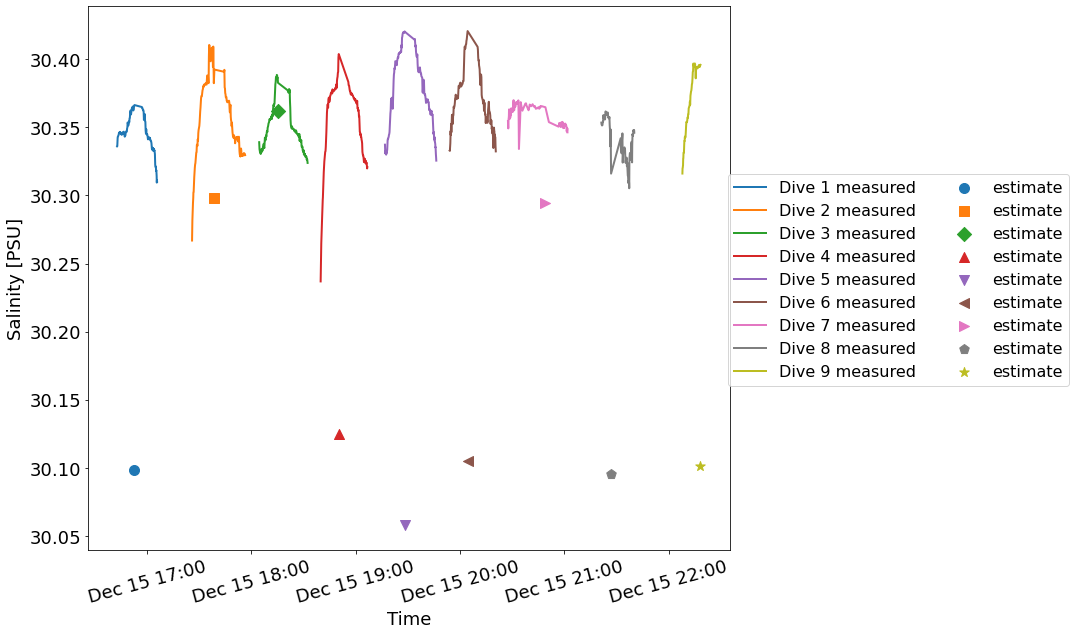

In [24]:
sal_est = [30.0986, 30.2981, 30.3621, 30.1244, 30.0577, 30.1052, 30.2946, 30.0954, 30.1014]
expected_sal  = []
data_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/"
files = os.listdir(data_path)
files.remove('.DS_Store')
files = sorted(files, key=lambda x: int(x[-4]))

fig, ax = plt.subplots(figsize=(11.5, 10))
plots = []
line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1, 1, 1))]
scatter_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']
for i, file in enumerate(files):
    ds = xr.open_dataset(data_path +file)
    df = pd.DataFrame()
    temp = ds['temperature'].values
    s = ds["absolute_salinity"].values
    d = ds['depth'].values
    t = ds['time'].values
    df['time'] = t
    df["temp"] = temp
    df["sal"] = s
    df['depth'] = d
    df = df.dropna()


    max_depth = np.max(df['depth'])
    max_depth_data = df.query('depth == @max_depth')
    expected_sal.append(max_depth_data['sal'].values)
    plots += ax.plot(df['time'], df['sal'], label = f"Dive {file[-4]} measured", linewidth=2)
    ax.scatter(max_depth_data['time'], sal_est[i], marker=scatter_markers[i], s = 100, label = "estimate")

print(expected_sal)
# labels = [l.get_label() for l in plots]
ax.set_ylabel("Salinity [PSU]",  fontsize=18)
ax.set_xlabel("Time", fontsize=18)
ax.tick_params(labelsize=18)
fig.legend(fontsize=16, ncol=2, loc='center right', bbox_to_anchor=(1.32, 0.5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
for tick in ax.get_xticklabels():
    tick.set_rotation(15)
# ax.legend(fontsize=16)
# plt.tight_layout()
    
plt.show()

[-0.39626317 42.21123421]


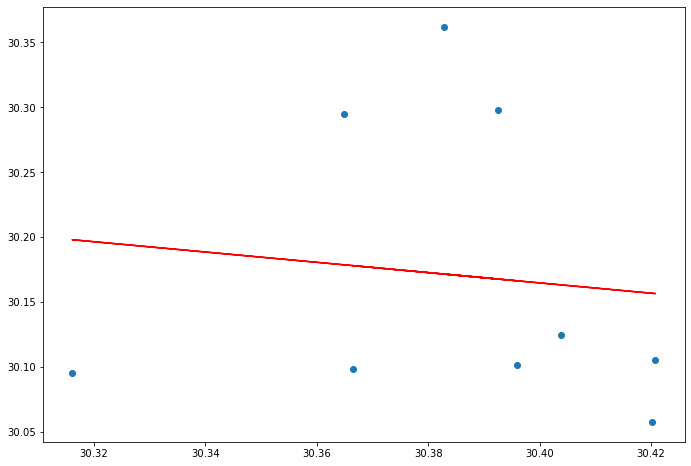

In [ ]:
fig, ax = plt.subplots(figsize = (11.5, 8))
ax.scatter(expected_sal, sal_est)
coefficients = np.polyfit(np.array(expected_sal).flatten(), np.array(sal_est).flatten(), 1)
print(coefficients)
poly = np.poly1d(coefficients)
plt.plot(expected_sal, poly(expected_sal), color='red', label=f'Linear Regression: y =')